In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import scipy.io
import math
import os

In [2]:
simulation_names = ['linear', 'exponential', 'cubic', 'joint_normal', 'step',
                    'quadratic', 'w_shape', 'spiral', 'bernoulli', 'log',
                    'fourth_root', 'sine_4pi', 'sine_16pi', 'square', 'two_parabolas',
                    'circle', 'ellipse', 'diamond', 'multi_noise', 'multi_indept']

In [3]:
def get_data(simulation_type):
    file_name_prefix = 'matlabsim_{}_dim1'.format(simulation_type)

    matrix_X = scipy.io.loadmat(file_name_prefix + '_X_simplot.mat')['x_mat']
    matrix_Y = scipy.io.loadmat(file_name_prefix + '_Y_simplot.mat')['y_mat']
    
    return matrix_X, matrix_Y

In [4]:
def translate_by_val(matrix_X, val):
    # apply two sample transform
    mat_X = matrix_X + val
    
    return mat_X

In [5]:
def plot_all_simulations():
    fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(2*11.7+2, 2*8.27+2))
    for simulation_type in range(1, 20):
        row = (simulation_type-1) // 5
        col = (simulation_type-1) % 5

        x, y = get_data(simulation_type)
        sim = simulation_type - 1
        val=[0.47, 5500000, 5.5, 0.9, 0.7, 0.7, 0.7, 0.7, 0.7, 1.1, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 2.59, 0.7, 0.7, 0.7]
        new_x = translate_by_val(x,val[sim])

        ax_sub = sns.scatterplot(x=x[:,0], y=y[:,0], ax=axs[row][col])
        ax_sub = sns.scatterplot(x=new_x[:,0], y=y[:,0], ax=axs[row][col])
        ax_sub.set_title(simulation_names[simulation_type-1], fontweight='bold', fontsize='x-large')

    # plot last sim outside, to get only one legend
    ax_sub = sns.scatterplot(x=x[:,0], y=y[:,0], label='Normal', ax=axs[3][4])
    ax_sub = sns.scatterplot(x=new_x[:,0], y=y[:,0], label='Translated', ax=axs[3][4])
    ax_sub.set_title(simulation_names[19], fontweight='bold', fontsize='x-large')

    fig.text(0.5, 0.09, 'X Vector', ha='center', fontsize=20)
    fig.text(0.09, 0.5, 'Y Vector', va='center', rotation='vertical', fontsize=20)

    plt.legend(bbox_to_anchor=(0.98, 0.515), bbox_transform=plt.gcf().transFigure, fontsize='x-large', markerscale=2)
    plt.show()

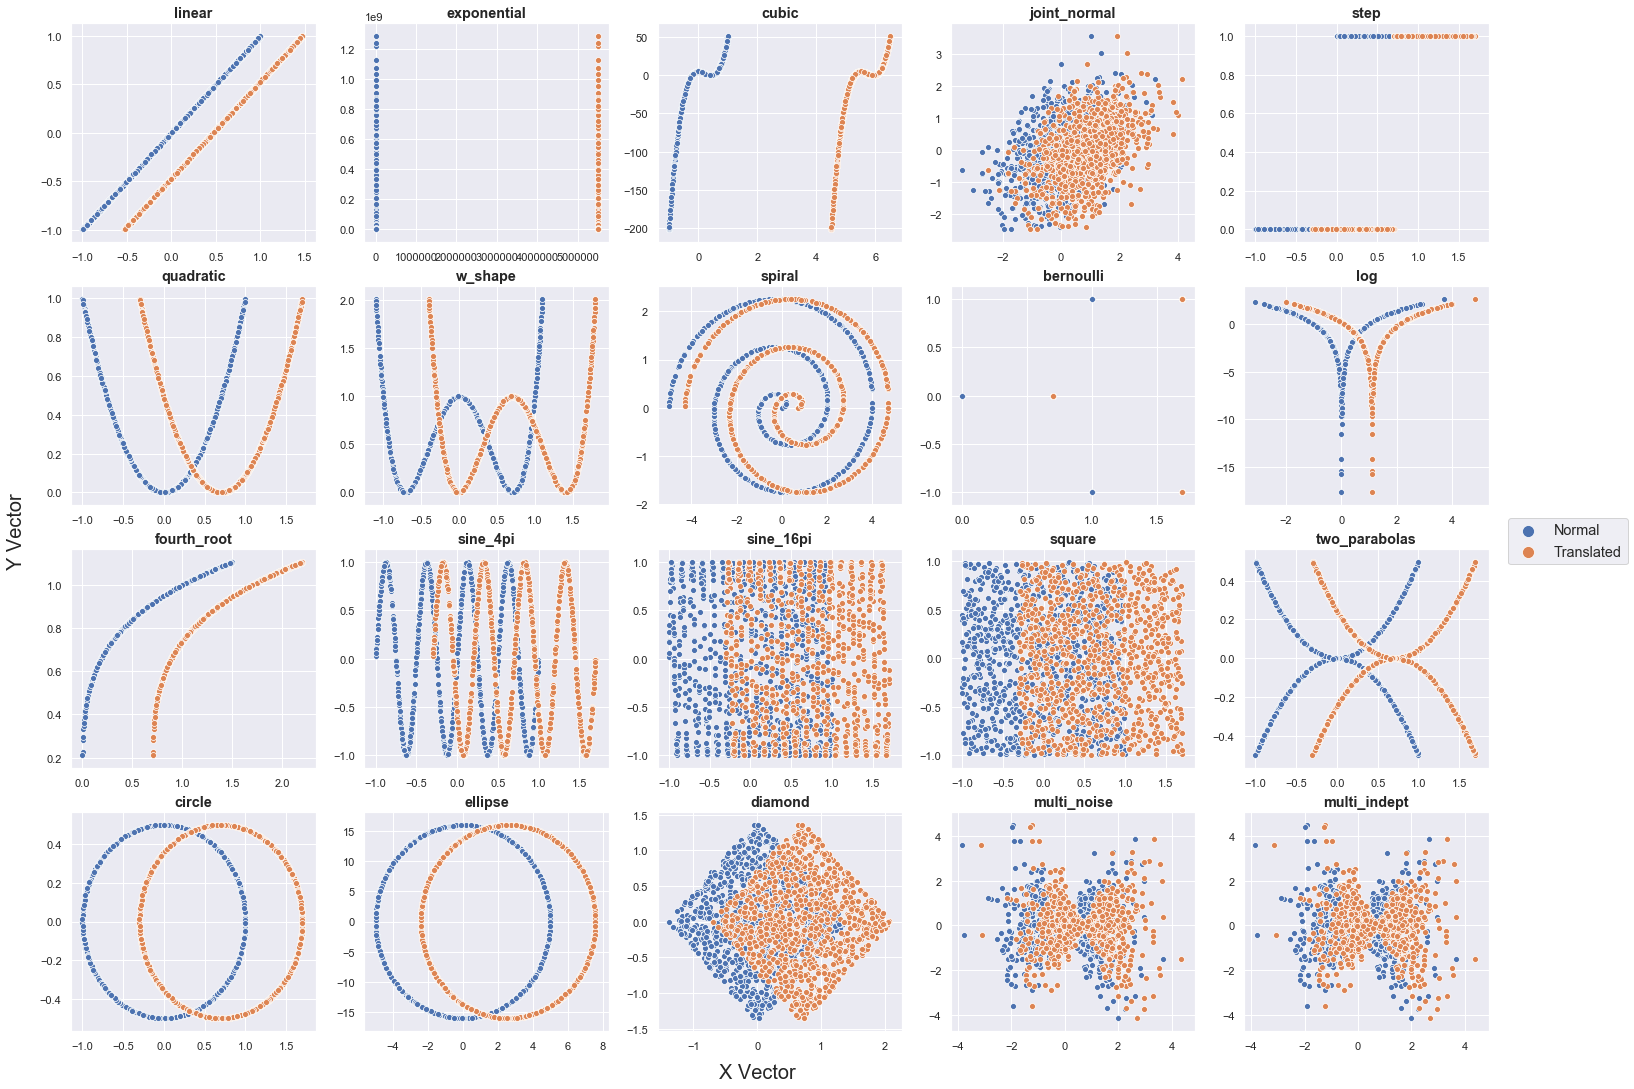

In [6]:
plot_all_simulations()